In [2]:
import requests
url = 'https://raw.githubusercontent.com/sergeyfitts/hse_nlp_minor/main/week4/HW1.txt'
r = requests.get(url)
open('abstracts.txt', 'wb').write(r.content)

10353112

In [3]:
with open('abstracts.txt', encoding='latin-1') as f:
    content = f.read()

In [4]:
abstracts = []
abstract_tag = 'Abstract: '
paper_delimiter = '-------------------'
reading_abstract = False
for line in content.split('\n'):
    line = line.strip()
    if line.startswith(abstract_tag):
        abstracts.append(line[len(abstract_tag):].strip() + ' ')
        reading_abstract = True
    elif line == paper_delimiter:
        reading_abstract = False
    elif reading_abstract:
        abstracts[-1] += line.strip() + ' '

In [5]:
print(len(abstracts))
print(abstracts[0])
print(abstracts[5])

5990
Applying a series of techniques intended to induce, detect and isolate lethal and/or sterile temperature-sensitive mutants, specific to the self-fertilizing hermaphrodite nematode Caenorhabditis elegans, Bergerac strain, 25 such mutants have been found.  Optimal conditions for the application of mutagenic treatment and the detection of such mutations are discussed. 
The anatomy of the pharynx of Caenorhabditis elegans has been reconstructed from electron micrographs of serial sections.  The pharynx is used for pumping food into the gut, and is composed of 34 muscle cells, 9 marginal cells, 9 epithelial cells, 5 gland cells and 20 neurones.  Three regions of specialization in the cuticle lining of the pharyngeal lumen may aid in the accumulation of food particles.  A basement membrane isolates the pharynx from the rest of the animal, making the pharyngeal nervous system a nearly self-contained unit which is composed primarily of five classes of motor neurones and six classes of int

In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/murfel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/murfel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/murfel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.tokenize import word_tokenize
# Tokenize
tokenized_abstracts = [word_tokenize(abstract) for abstract in abstracts]
tokenized_abstracts = [[token.strip().lower() for token in abstract] for abstract in tokenized_abstracts]
# Lematize
lematizer = nltk.stem.WordNetLemmatizer()
lem_abstracts = [[lematizer.lemmatize(token) for token in abstract] for abstract in tokenized_abstracts]
# Drop stop words
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords_abstracts = [
    [word for word in document if word not in stopwords]
    for document in lem_abstracts
]
# Remove punctuation
from string import punctuation
punctuation_abstracts = [
    [word for word in document if word not in punctuation]
    for document in stopwords_abstracts
]
# Remove badwords
bad_words = ["n't", "'s", 'and/or']
clean_abstracts = [
    [word for word in document if word not in punctuation]
    for document in punctuation_abstracts
]

In [8]:
for token in clean_abstracts[0]:
    print(token, end=' ')

applying series technique intended induce detect isolate lethal and/or sterile temperature-sensitive mutant specific self-fertilizing hermaphrodite nematode caenorhabditis elegans bergerac strain 25 mutant found optimal condition application mutagenic treatment detection mutation discussed 

In [9]:
#  создаем словарь
from gensim import corpora
dictionary = corpora.Dictionary(clean_abstracts)

In [10]:
# проводим векторизацию
# doc-term matrix M
corpus = [dictionary.doc2bow(text) for text in clean_abstracts]

In [11]:
# tfidf model
from gensim import models
tfidf_model = models.TfidfModel(corpus)

In [12]:
# tfidf
tfidf = tfidf_model[corpus]

# LSI

In [19]:
lsi = models.LsiModel(tfidf, id2word=dictionary, num_topics=6)
corpus_lsi = lsi[tfidf]

In [20]:
lsi.show_topics(num_words=3)


[(0, '0.213*"cell" + 0.163*"gene" + 0.124*"protein"'),
 (1, '-0.382*"cell" + -0.314*"death" + -0.182*"fate"'),
 (2, '1.000*"french" + -0.003*"tra-1" + 0.003*"mhc"'),
 (3, '0.386*"death" + 0.209*"aging" + 0.190*"programmed"'),
 (4, '-0.328*"death" + 0.207*"life" + -0.190*"ced-4"'),
 (5, '0.252*"chromosome" + 0.242*"x" + 0.222*"male"')]

In [16]:
# Determine the number of topics
# datacamp.com/community/tutorials/discovering-hidden-topics-python
coherence_values = []
model_list = []
# Test num topics up to 10, because it takes too much time with higher values.
for num_topics in range(1, 12):
    # generate LSA model
    model = models.LsiModel(corpus, num_topics=num_topics, id2word = dictionary)  # train model
    model_list.append(model)
    coherencemodel = models.CoherenceModel(model=model, texts=clean_abstracts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

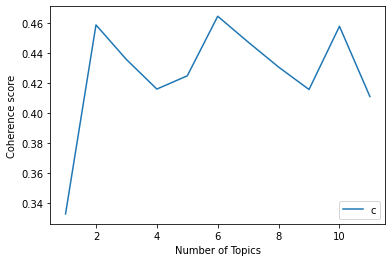

In [18]:
# Plot the coherence score for each num of topics
import matplotlib.pyplot as plt
x = range(1, 12)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend("coherence_values", loc='best')